In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
raw = pd.read_csv('pgh.csv')
df = raw.copy().iloc[::2]

In [32]:
df['percent grade'] = np.gradient(df['elevation(meters)'], df['Distance from start(meters)'])*100

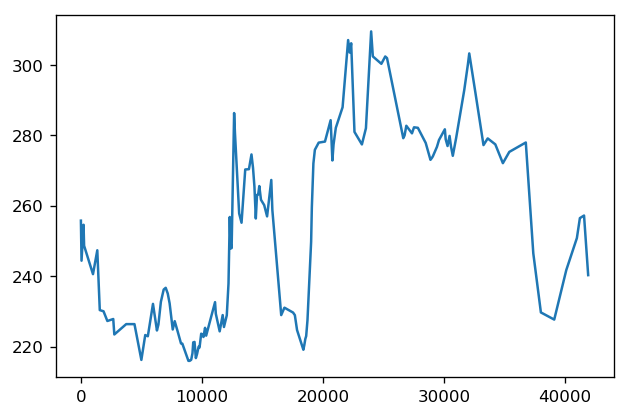

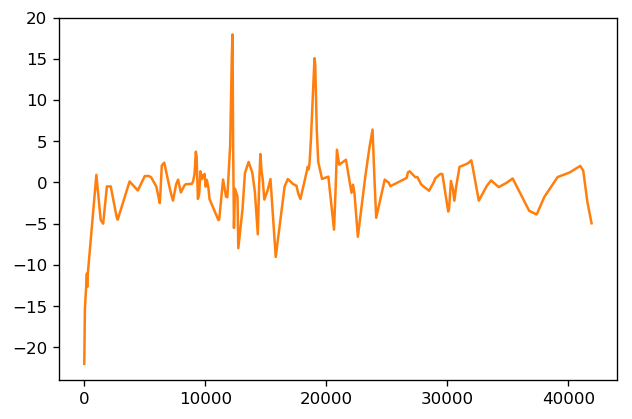

In [36]:
plt.figure(dpi=120)
plt.plot(df['Distance from start(meters)'], df['elevation(meters)'])
plt.show()

plt.figure(dpi=120)
plt.plot(df['Distance from start(meters)'], df['percent grade'], color='C1')
plt.show()

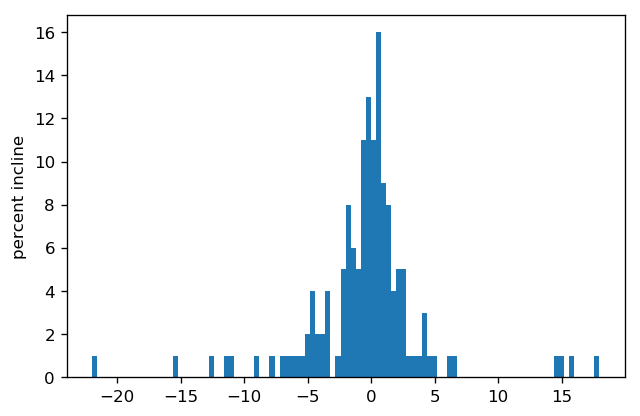

In [52]:
plt.figure(dpi=120)
plt.hist(df['percent grade'], bins=100);
plt.ylabel('percent incline');

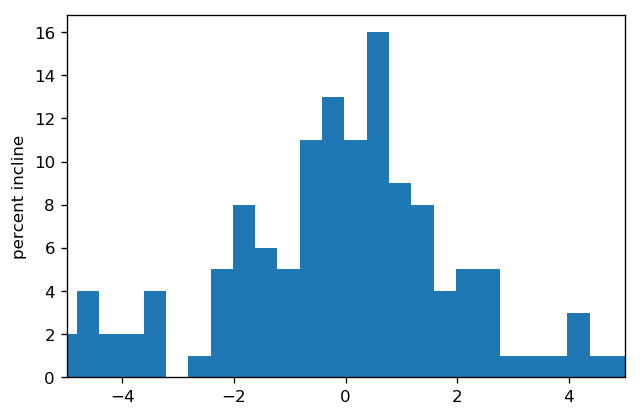

In [54]:
plt.figure(dpi=120)
plt.hist(df['percent grade'], bins=100);
plt.xlim(-5,5);
plt.ylabel('percent incline');